# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
%matplotlib inline

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df=pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


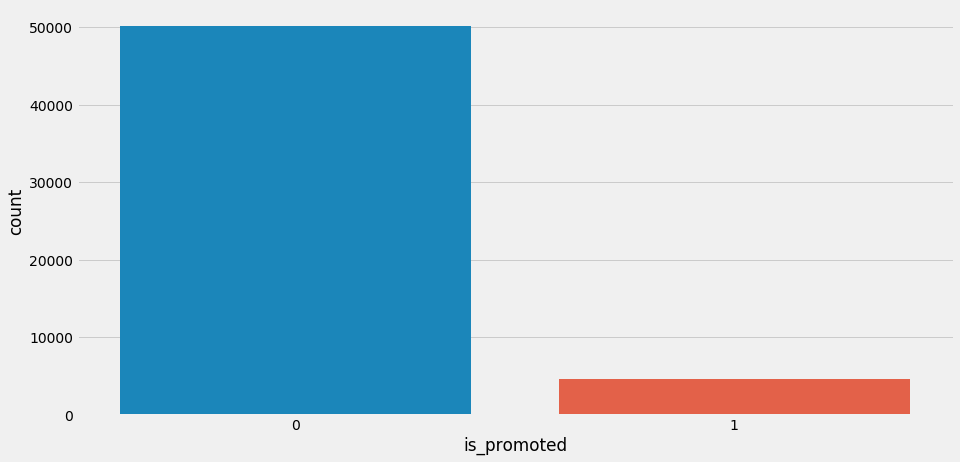

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
sns.countplot(df.is_promoted)

In [7]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.dtypes

employee_id               int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
numeric_features=numeric_features.drop(['employee_id','KPIs_met >80%','awards_won?','is_promoted'],axis=1)

In [9]:
numeric_features.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,0.042517
age,-0.081278,1.000000,0.006008,0.657111,-0.048380
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.075139
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,1.000000


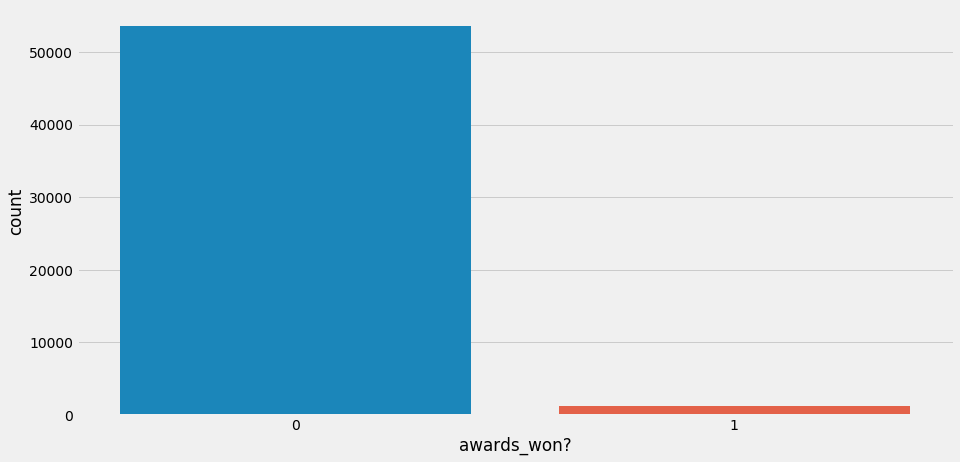

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(df['awards_won?'])

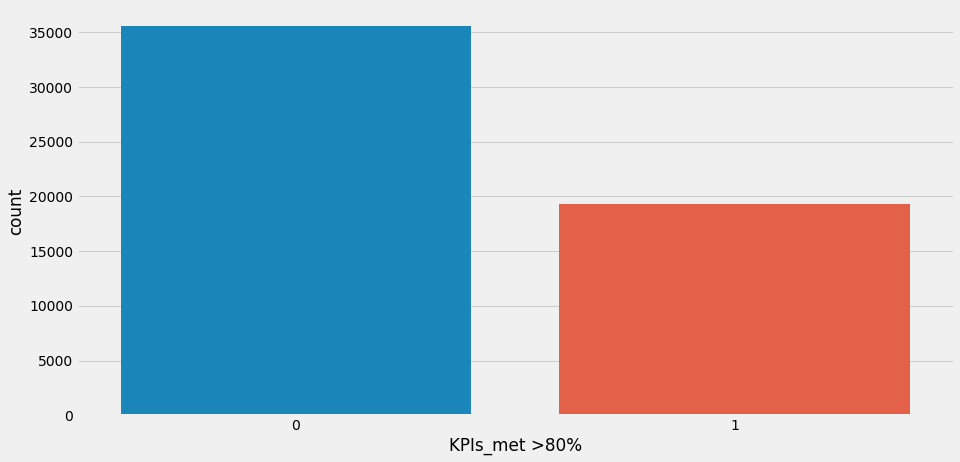

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(df['KPIs_met >80%'])

In [12]:
df['KPI']=df['KPIs_met >80%']
df['award']=df['awards_won?']
df=df.drop(['KPIs_met >80%','awards_won?'],axis=1)

In [13]:
colNames=df.columns

for i in colNames:
    print("Unique values of ",i," ",df[i].unique(),'\n')

Unique values of  employee_id   [65438 65141  7513 ... 13918 13614 51526] 

Unique values of  department   ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 

Unique values of  region   ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 

Unique values of  education   ["Master's & above" "Bachelor's" nan 'Below Secondary'] 

Unique values of  gender   ['f' 'm'] 

Unique values of  recruitment_channel   ['sourcing' 'other' 'referred'] 

Unique values of  no_of_trainings   [ 1  2  3  4  7  5  6  8 10  9] 

Unique values of  age   [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40

remove null values

In [14]:
education_mode=df.pivot_table(columns='education',values='is_promoted',aggfunc=lambda x:x.mode())

In [15]:
education_mode

education,Bachelor's,Below Secondary,Master's & above
is_promoted,0,0,0


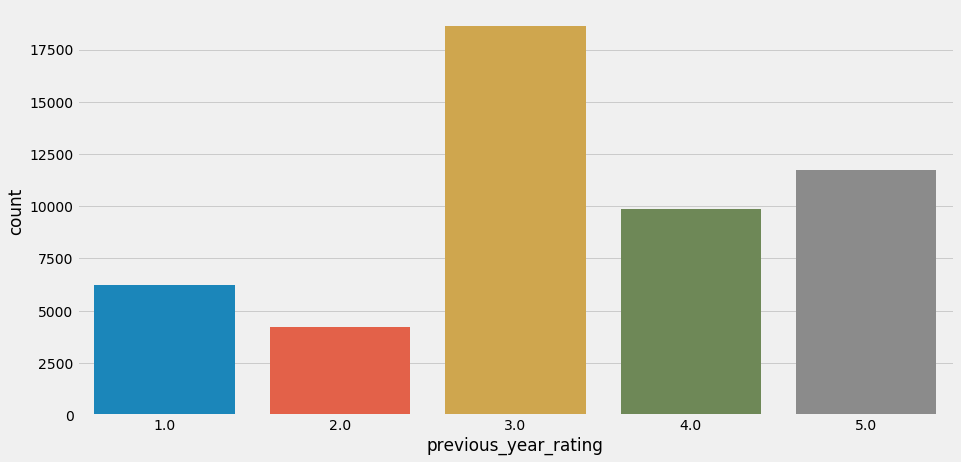

In [16]:
plt.figure(figsize=(14,7))
sns.countplot(df.previous_year_rating)

In [17]:
df.isnull().sum()/len(df)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
avg_training_score      0.000000
is_promoted             0.000000
KPI                     0.000000
award                   0.000000
dtype: float64

In [18]:
print ('Orignal #missing: %d'%sum(df.previous_year_rating.isnull()))

Orignal #missing: 4124


In [19]:
previous_year_rating=df.pivot_table(values='previous_year_rating',columns='is_promoted',aggfunc=lambda x:x.mode())

In [20]:
previous_year_rating

is_promoted,0,1
previous_year_rating,3.0,5.0


In [21]:
previous_year_rating=previous_year_rating.T

In [22]:
promo=df['is_promoted']
rate=df['previous_year_rating']

for i in range(len(promo)):
    if(pd.isnull(rate[i])):
        #print(rate[i])
        df['previous_year_rating'][i]=previous_year_rating.iloc[previous_year_rating.index==promo[i]]['previous_year_rating'].values[0]
        
    
    
print ('Final #missing: %d'%sum(df['previous_year_rating'].isnull()))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Final #missing: 0


In [23]:
df=df.dropna(axis=0,how='any')

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()



In [25]:
'''categorical=['department','region','gender','recruitment_channel','education']

for i in categorical:
    df[str(i)]=le.fit_transform(df[str(i)])'''

"categorical=['department','region','gender','recruitment_channel','education']\n\nfor i in categorical:\n    df[str(i)]=le.fit_transform(df[str(i)])"

In [26]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,KPI,award
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,49,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,73,0,0,0


# Let's analyse data again

In [27]:
yes=df.loc[df['is_promoted']==1]
no=df.loc[df['is_promoted']==0]

In [28]:
yes.shape,no.shape

((4546, 14), (47853, 14))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

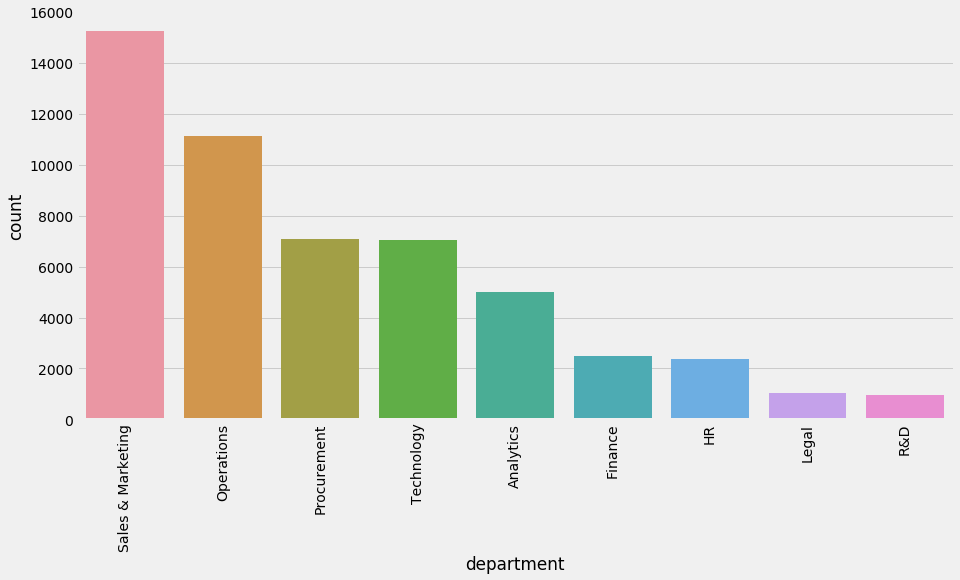

In [29]:
plt.figure(figsize=(14,7))
sns.countplot(df.department,order=df['department'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

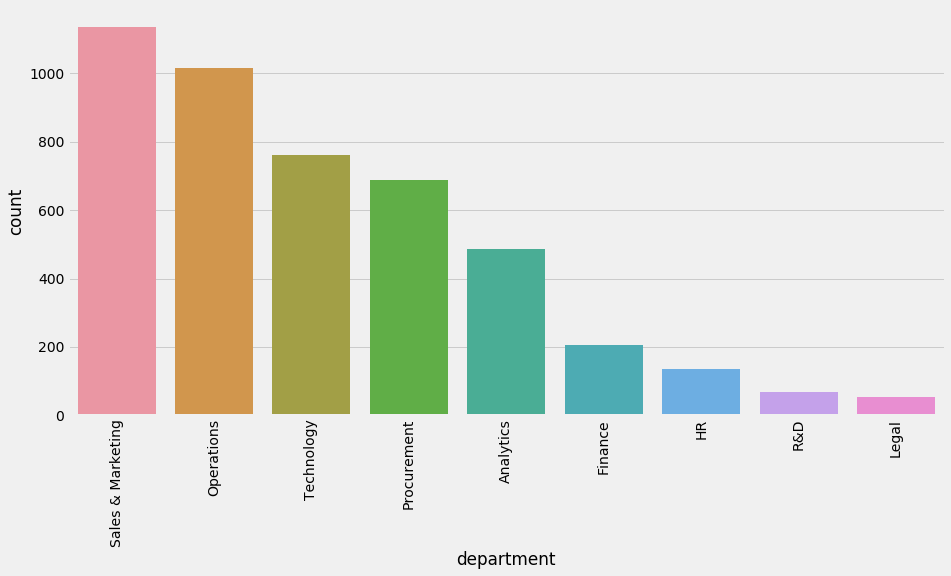

In [30]:
plt.figure(figsize=(14,7))
sns.countplot(yes.department,order=yes['department'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

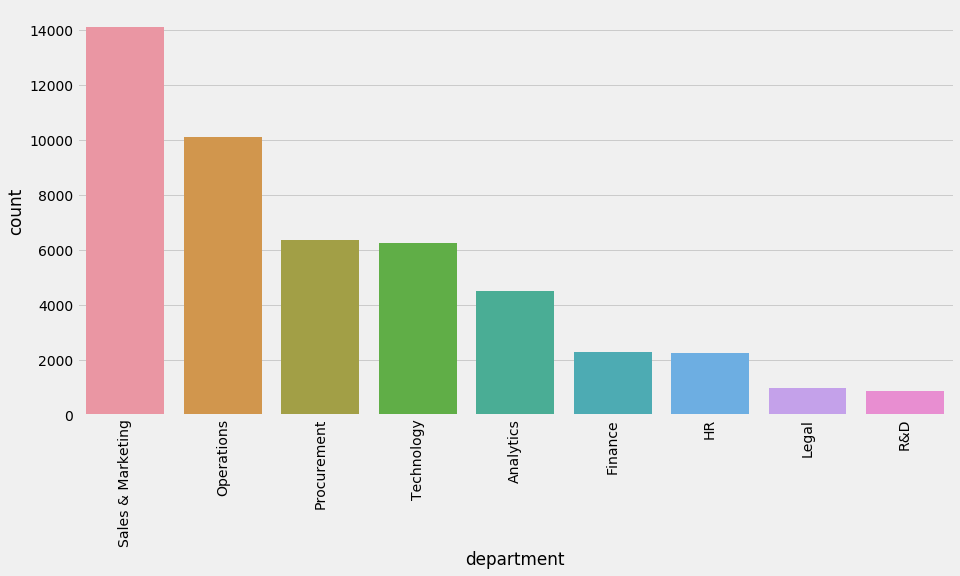

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(no.department,order=no['department'].value_counts().index)
plt.xticks(rotation=90)

In [32]:
# so this chart doesn't helps insight anything as most of the values are promoted and not promoted are sorted as total

In [33]:
#now we are going to analyse degree wise

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

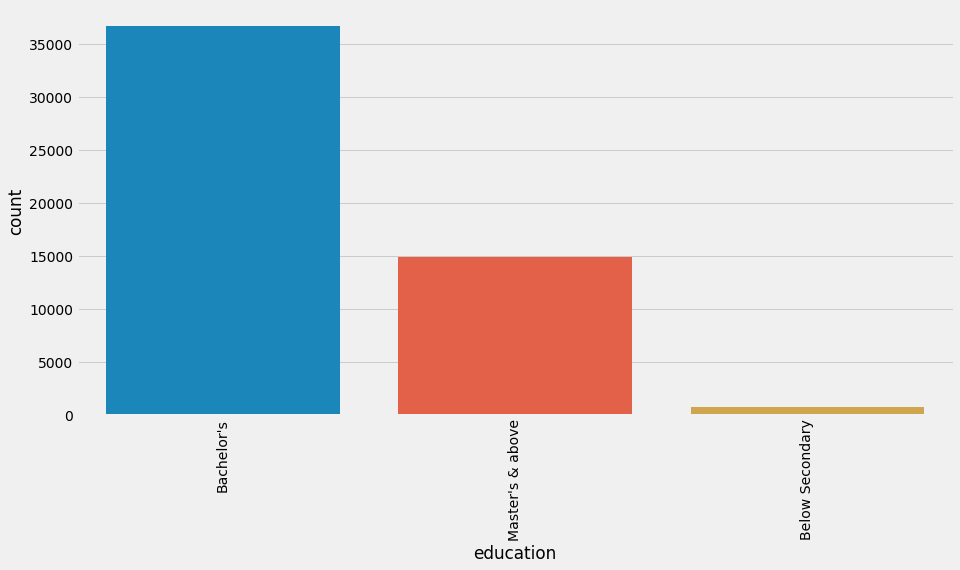

In [34]:
plt.figure(figsize=(14,7))
sns.countplot(df.education,order=df['education'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

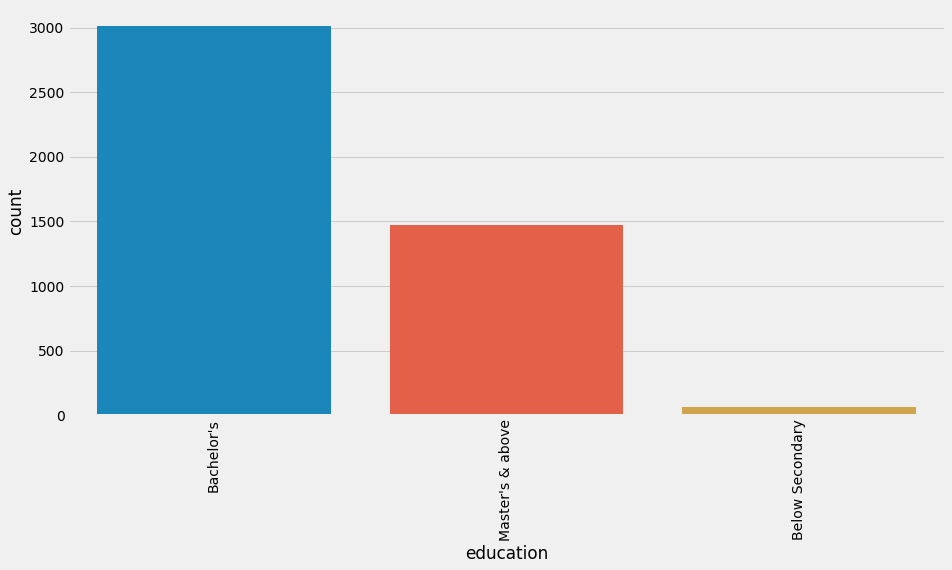

In [35]:
plt.figure(figsize=(14,7))
sns.countplot(yes.education,order=yes['education'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

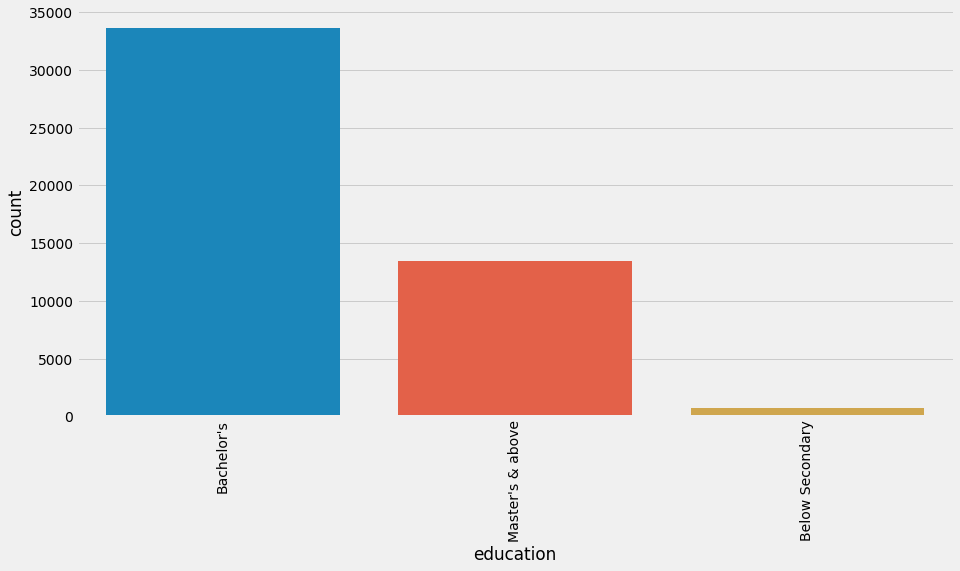

In [36]:
plt.figure(figsize=(14,7))
sns.countplot(no.education,order=no['education'].value_counts().index)
plt.xticks(rotation=90)

In [37]:
#this does as previous but now give preference to rating

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

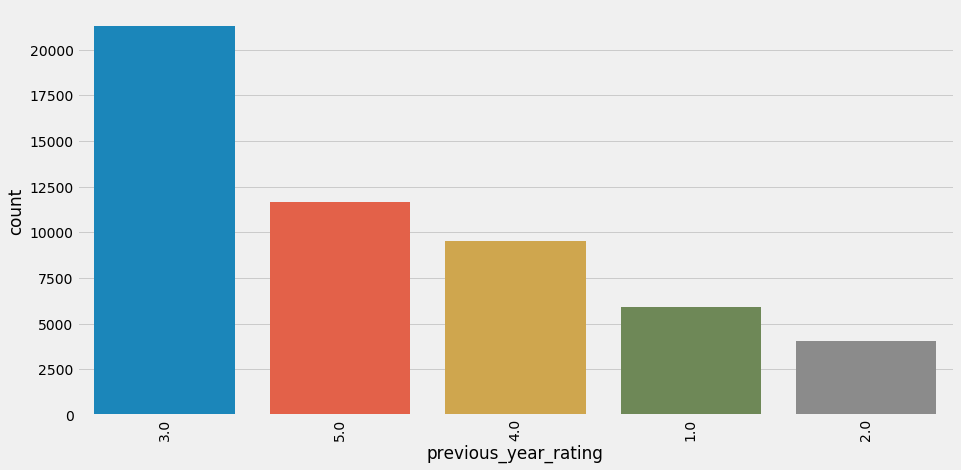

In [38]:
plt.figure(figsize=(14,7))
sns.countplot(df.previous_year_rating,order=df['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

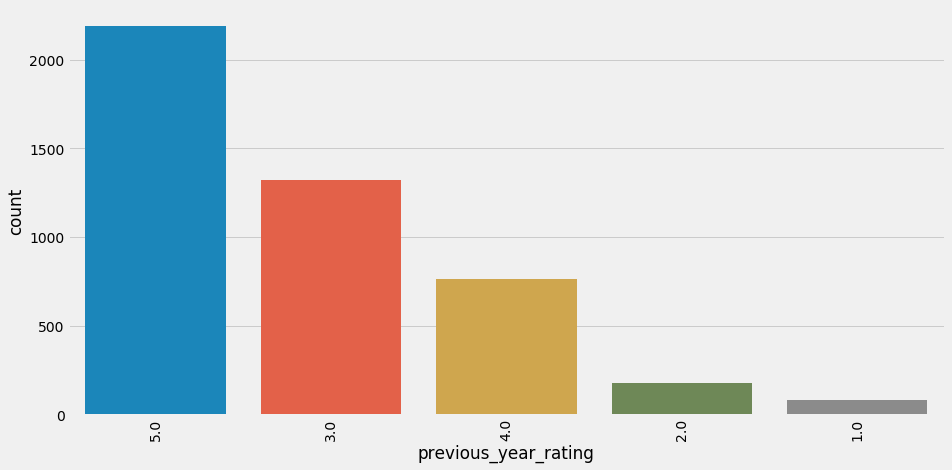

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(yes.previous_year_rating,order=yes['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

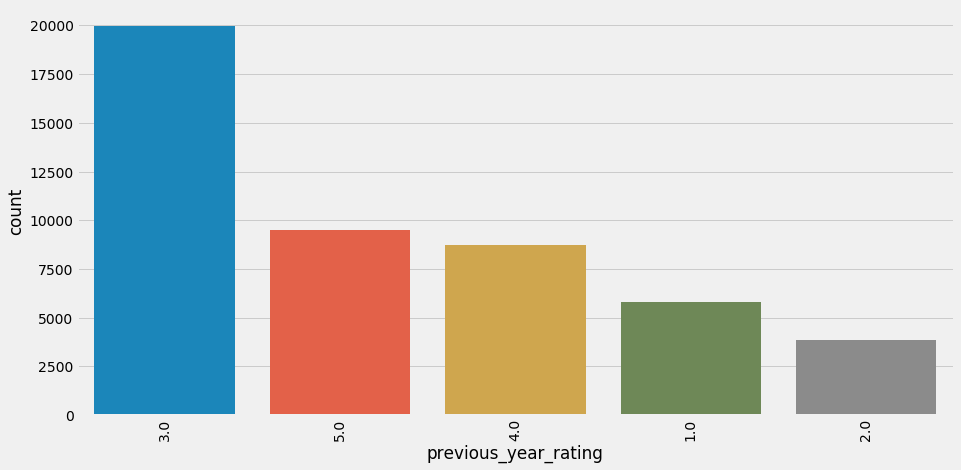

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(no.previous_year_rating,order=no['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

In [41]:
print(len(df[df['previous_year_rating']==5]),len(df))
print(len(yes.loc[df['previous_year_rating']==5]),len(yes))
print(len(no[df['previous_year_rating']==5]),len(no))

11676 52399
2189 4546
9487 47853


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#our values is not all dependent on this but it is quite important one compare to both of two we worked earlier

In [43]:
# now ler's inspect gender too

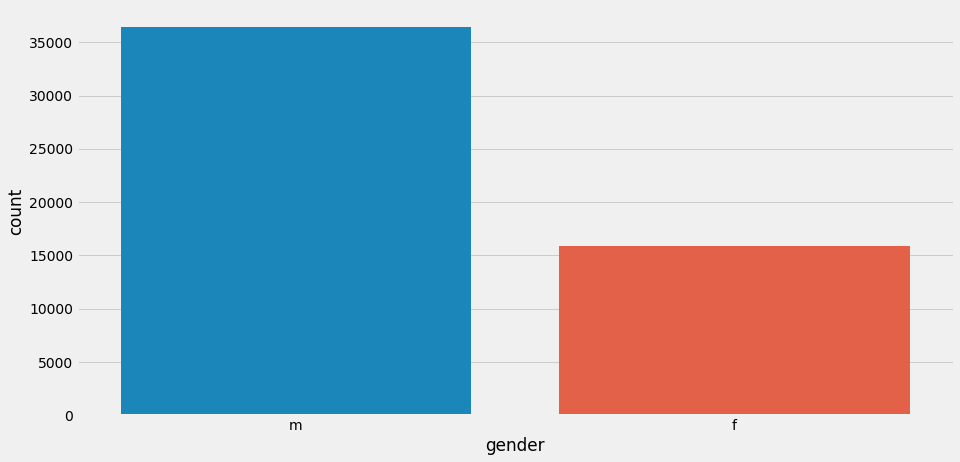

In [46]:
plt.figure(figsize=(14,7))
sns.countplot(df.gender,order=df.gender.value_counts().index)

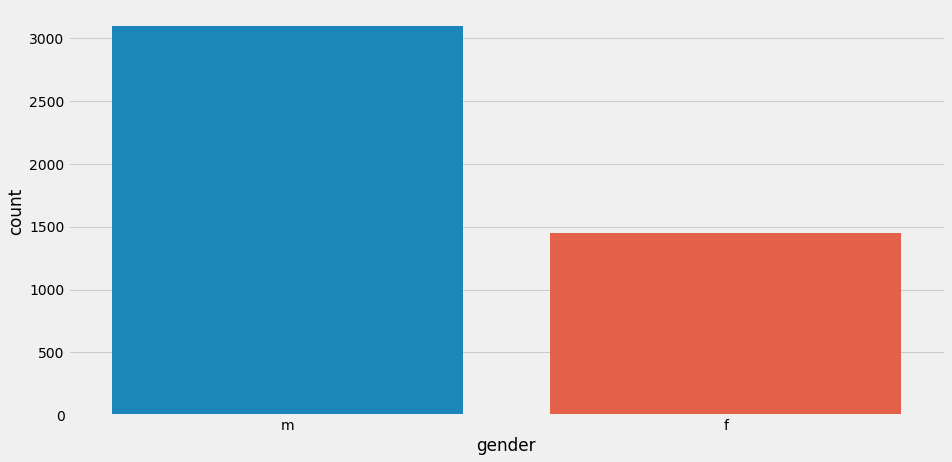

In [47]:
plt.figure(figsize=(14,7))
sns.countplot(yes.gender,order=yes.gender.value_counts().index)

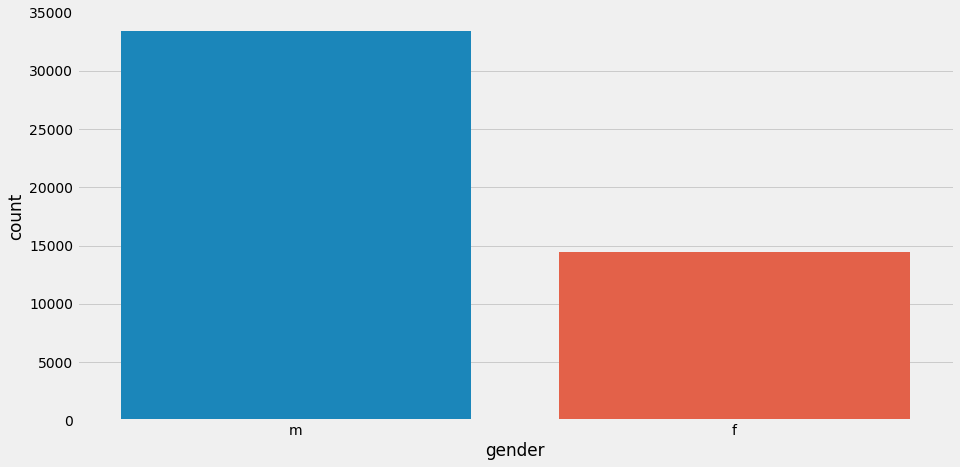

In [48]:
plt.figure(figsize=(14,7))
sns.countplot(no.gender,order=no.gender.value_counts().index)

In [49]:
#gender is an important feature, we will apply one-hot encoding later

In [50]:
#now look at recruitment channel

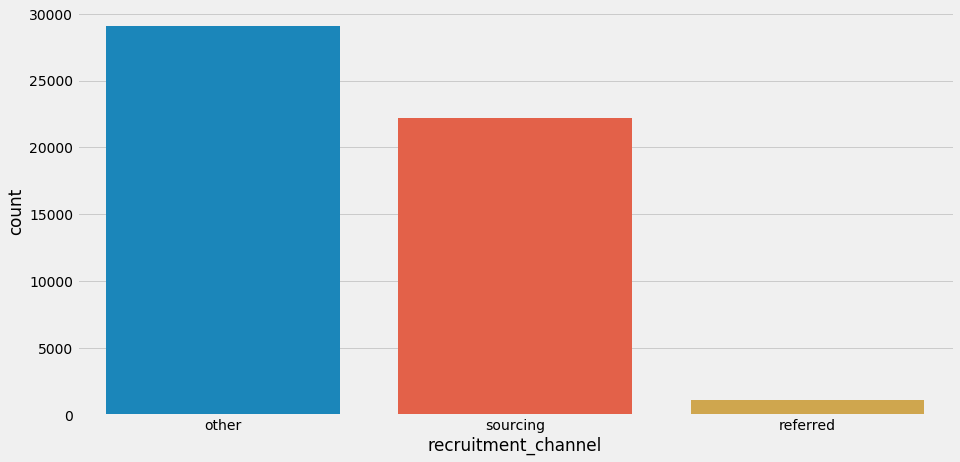

In [51]:
plt.figure(figsize=(14,7))
sns.countplot(df.recruitment_channel,order=df.recruitment_channel.value_counts().index)

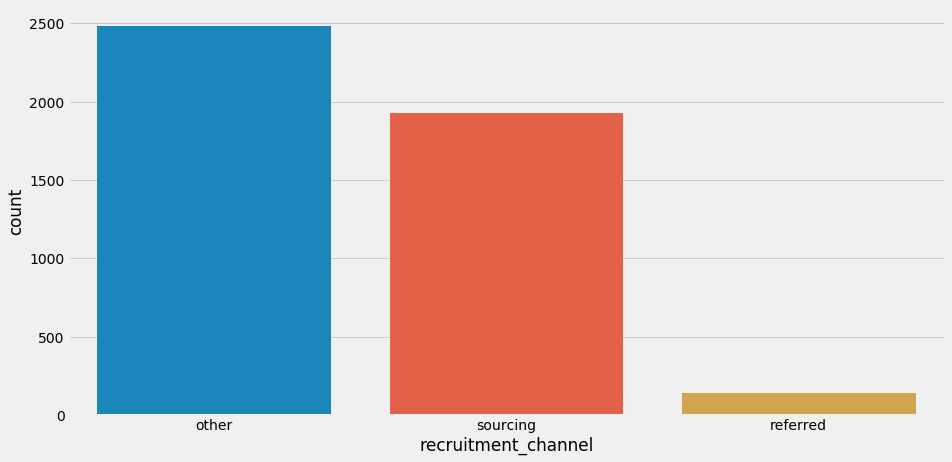

In [53]:
plt.figure(figsize=(14,7))
sns.countplot(yes.recruitment_channel,order=yes.recruitment_channel.value_counts().index)

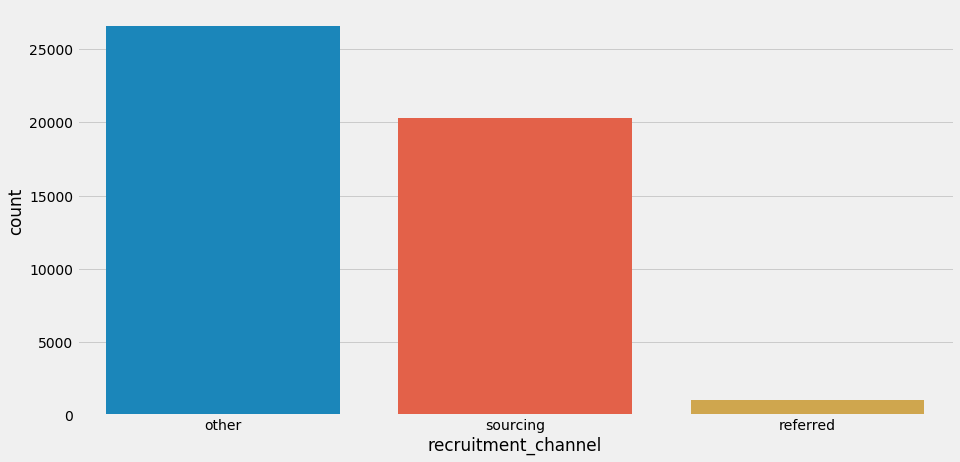

In [54]:
plt.figure(figsize=(14,7))
sns.countplot(no.recruitment_channel,order=no.recruitment_channel.value_counts().index)

In [55]:
#this column doesn't have major role

In [57]:
#number of training

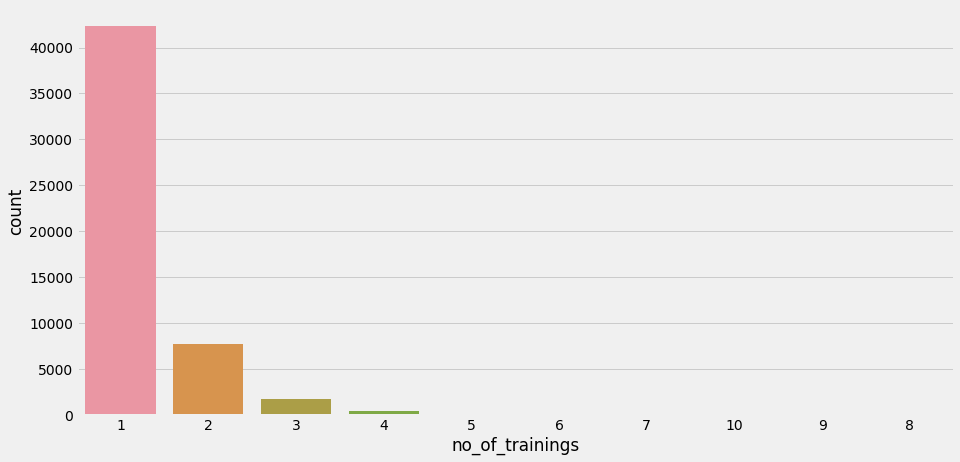

In [58]:
plt.figure(figsize=(14,7))
sns.countplot(df.no_of_trainings,order=df.no_of_trainings.value_counts().index)

In [62]:
print(df.no_of_trainings.value_counts())
yes.no_of_trainings.value_counts()

1     42317
2      7708
3      1726
4       454
5       124
6        43
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


1    3797
2     598
3     121
4      26
5       3
6       1
Name: no_of_trainings, dtype: int64

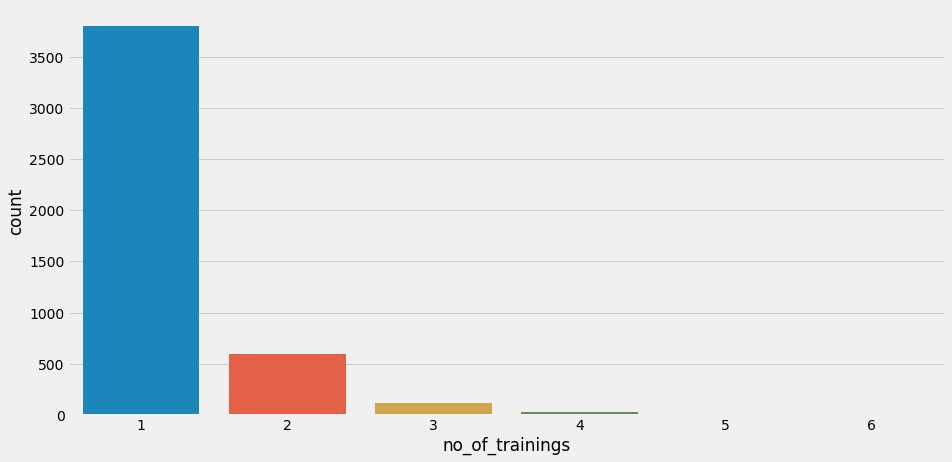

In [60]:
plt.figure(figsize=(14,7))
sns.countplot(yes.no_of_trainings,order=yes.no_of_trainings.value_counts().index)

In [63]:
#KPI

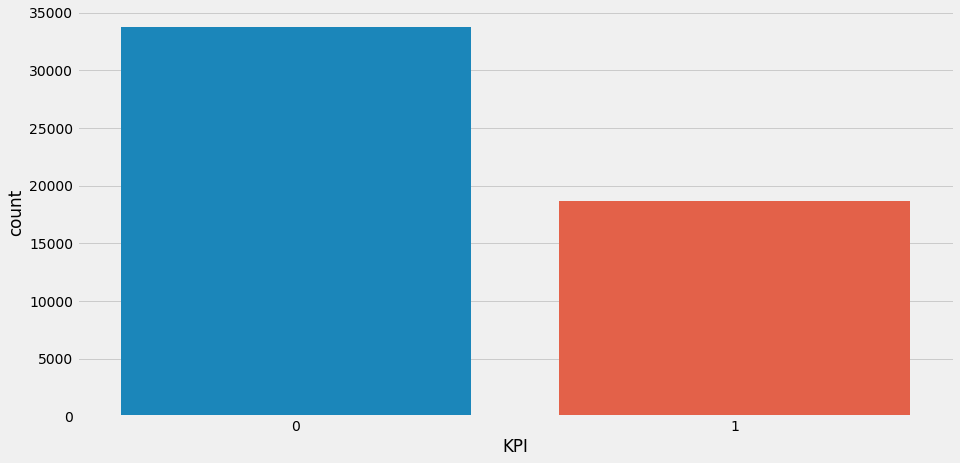

In [64]:
plt.figure(figsize=(14,7))
sns.countplot(df.KPI,order=df.KPI.value_counts().index)

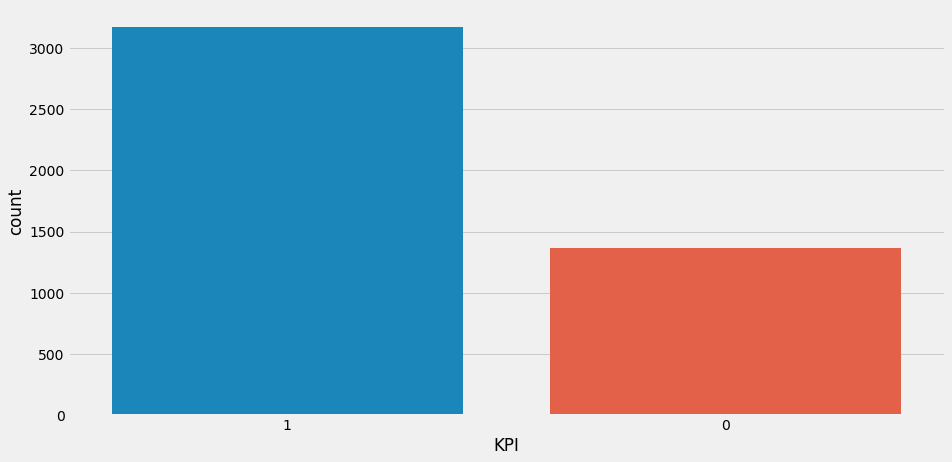

In [65]:
plt.figure(figsize=(14,7))
sns.countplot(yes.KPI,order=yes.KPI.value_counts().index)

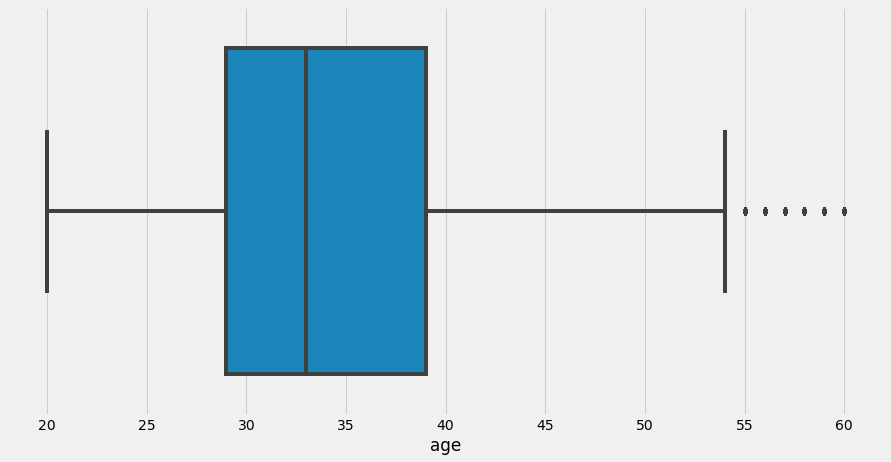

In [68]:
plt.figure(figsize=(14,7))
sns.boxplot(df.age)


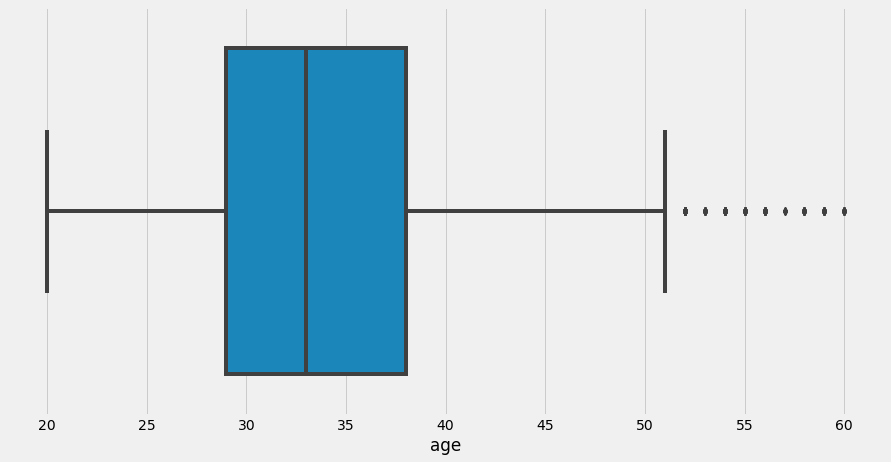

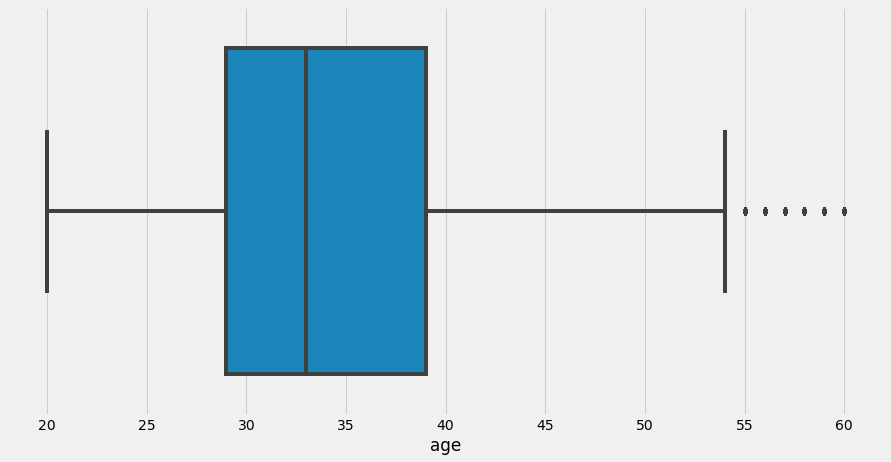

In [77]:
plt.figure(figsize=(14,7))
sns.boxplot(no.age)

In [80]:
df_final=df[['gender','previous_year_rating','award','length_of_service','avg_training_score','is_promoted']]

In [81]:
df_final.head()

,gender,previous_year_rating,award,length_of_service,avg_training_score,is_promoted
0,f,5.0,0,8,49,0
1,m,5.0,0,4,60,0
2,m,3.0,0,7,50,0
3,m,1.0,0,10,50,0
4,m,3.0,0,2,73,0


In [84]:
df_final['gender']=le.fit_transform(df_final['gender'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_final.head()

,gender,previous_year_rating,award,length_of_service,avg_training_score,is_promoted
0,0,5.0,0,8,49,0
1,1,5.0,0,4,60,0
2,1,3.0,0,7,50,0
3,1,1.0,0,10,50,0
4,1,3.0,0,2,73,0


In [91]:
y=df_final['is_promoted']
X=df_final.drop(['is_promoted'],axis=1)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
X_train.head()

,gender,previous_year_rating,award,length_of_service,avg_training_score
22267,1,5.0,0,6,67
24212,1,3.0,0,1,50
35627,1,3.0,0,2,52
42455,1,3.0,0,2,68
4648,1,3.0,0,1,42


In [100]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

LR.fit(X_train,y_train)
predic=LR.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
LR.score(X_test,y_test)

0.9188063844552394

In [102]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(predic,y_test)
print(confusion_matrix(predic,y_test))

[[15775  1377]
 [   27   113]]


In [97]:
from sklearn.svm import SVC

svm=SVC()

svm.fit(X_train,y_train)
predic=svm.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [193]:
df_test=pd.read_csv('test_2umaH9m.csv')

In [194]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [195]:
df_t=df_test[['gender','previous_year_rating','awards_won?','length_of_service','avg_training_score']]

In [196]:
df_t.isnull().sum()/len(df_t)*100

gender                  0.000000
previous_year_rating    7.713921
awards_won?             0.000000
length_of_service       0.000000
avg_training_score      0.000000
dtype: float64

In [197]:
rate=df_t['previous_year_rating']

for i in range(len(rate)):
    if(pd.isnull(rate[i])):
        #print(rate[i])
        df_t['previous_year_rating'][i]=3
        
    
    
#print ('Final #missing: %d'%sum(df['previous_year_rating'].isnull()))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [198]:
df_t.head()

,gender,previous_year_rating,awards_won?,length_of_service,avg_training_score
0,m,3.0,0,1,77
1,f,3.0,0,5,51
2,m,1.0,0,4,47
3,f,2.0,0,9,65
4,m,4.0,0,7,61


In [199]:
df_t['gender']=le.fit_transform(df_t['gender'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
df_test['is_promoted']=knn.predict(df_t)

In [165]:
pred.shape

(21678,)

In [166]:
df_t.shape

(23490, 6)

In [167]:
np.bincount(pred)

array([21401,   277], dtype=int64)

In [203]:
target='is_promoted'
IDcol=['employee_id']
IDcol.append(target)

In [210]:
IDcol

['employee_id', 'is_promoted']

In [211]:
submission = pd.DataFrame({ x: df_test[x] for x in IDcol})

In [212]:
submission.sample(10)

,employee_id,is_promoted
12486,72972,0
12838,31271,0
20123,55979,0
557,28860,0
10023,17348,0
4314,7467,0
12304,42617,0
17424,62987,0
11474,43563,0
10347,9412,0


In [213]:
submission.to_csv("knn.csv", index=False)

In [201]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [222]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import nadam
from keras.optimizers import  SGD,Adadelta
import keras.optimizers
from keras.wrappers.scikit_learn import KerasClassifier


model=Sequential()
model.add(Dense(3,activation='selu'))
model.add(Dense(5,activation='selu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(11,activation='selu'))
model.add(Dense(5,activation='selu'))
#model.add(Dense(3,activation='selu'))
model.add(Dense(1,kernel_initializer='normal'))

nadam_mode=nadam(lr=0.01)
sgd=SGD( lr=0.001,momentum=0.3,decay=0.2)
adaDelta=Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adaDelta)

history=model.fit(x=X.values,y=y.values,batch_size=16,epochs=10,verbose=1)    

Epoch 1/10
52399/52399 [==============================] - 4s 75us/step - loss: 0.2825
Epoch 2/10
52399/52399 [==============================] - 4s 67us/step - loss: 0.2824
Epoch 3/10
52399/52399 [==============================] - 3s 66us/step - loss: 0.2824
Epoch 4/10
52399/52399 [==============================] - 4s 69us/step - loss: 0.2823
Epoch 5/10
52399/52399 [==============================] - 4s 81us/step - loss: 0.2823
Epoch 6/10
52399/52399 [==============================] - 4s 72us/step - loss: 0.2822
Epoch 7/10
52399/52399 [==============================] - 4s 72us/step - loss: 0.2823
Epoch 8/10
52399/52399 [==============================] - 4s 71us/step - loss: 0.2822
Epoch 9/10
52399/52399 [==============================] - 4s 78us/step - loss: 0.2822
Epoch 10/10
52399/52399 [==============================] - 4s 70us/step - loss: 0.2821


In [223]:
pred=model.predict(df_t)

In [224]:
pred

array([[0.11926955],
       [0.04762118],
       [0.03018518],
       ...,
       [0.04286323],
       [0.09586874],
       [0.16844784]], dtype=float32)

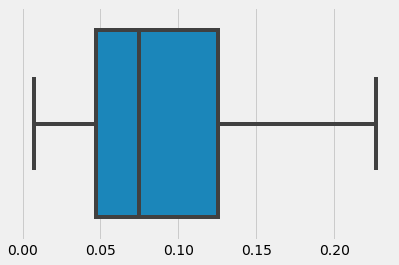

In [225]:
sns.boxplot(pred)